juliette.jin

# Install rdkit

using pypi or whatever install rdkit


In [1]:
! pip install pypi

In [2]:
import rdkit

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



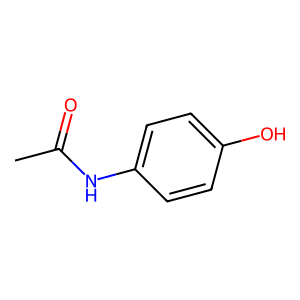

In [3]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import Draw

paracetamol = "CC(=O)NC1=CC=C(C=C1)O"
mol = MolFromSmiles(paracetamol)
Draw.MolToImage(mol)

In [4]:
mol.GetNumAtoms()

11

In [5]:
from rdkit.Chem import AddHs

molH = AddHs(mol)
molH.GetNumAtoms()

20

It should be 20 atoms. The reason is that the SMILES string does not contain the hydrogens.

In [6]:
for atom in molH.GetAtoms():
    print(atom.GetSymbol())

C
C
O
N
C
C
C
C
C
C
O
H
H
H
H
H
H
H
H
H


In [7]:
bonds = molH.GetNumBonds()
print(bonds)
# quel bound est le bon
print(mol.GetNumBonds())

20
11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [8]:
from rdkit.Chem import SDMolSupplier
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

suppl = SDMolSupplier('DB00295.sdf')
morphine = next(suppl)

vectMorphine = GetMorganFingerprintAsBitVect(morphine, 2)
vectMorphine.ToBitString()

[16:24:09] DEPRECATION WARNING: please use MorganGenerator


'000000000000000000000000000000000000000000000000000000000000000000010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000100000000000000000000000000000000000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000100000000001000000000000000000000000000000000000000000000000000000001000000000000001000000000010010000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000001000000001000010000000000000000000000000000000000000000000000000000000000

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [9]:
paracetamol = "CC(=O)NC1=CC=C(C=C1)O"
aspirin = "CC(=O)OC1=CC=CC=C1C(=O)O"

molParacetamol = MolFromSmiles(paracetamol)
molAspirin = MolFromSmiles(aspirin)

vectParacetamol = GetMorganFingerprintAsBitVect(molParacetamol, 2, nBits=1024)
vectAspirin = GetMorganFingerprintAsBitVect(molAspirin, 2, nBits=1024)

vectParacetamol.GetNumOnBits(), vectAspirin.GetNumOnBits()

[16:24:09] DEPRECATION WARNING: please use MorganGenerator
[16:24:09] DEPRECATION WARNING: please use MorganGenerator


(19, 24)

In [10]:
from rdkit import DataStructs

similarity = DataStructs.DiceSimilarity(vectParacetamol, vectAspirin)
similarity

0.37209302325581395

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [11]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors

descriptor_names = [desc[0] for desc in Descriptors._descList]
calc = MolecularDescriptorCalculator(descriptor_names)
res = calc.CalcDescriptors(molParacetamol)

for name, value in zip(descriptor_names, res):
    print(name, value)

MaxAbsEStateIndex 10.524468537414966
MaxEStateIndex 10.524468537414966
MinAbsEStateIndex 0.11510204081632636
MinEStateIndex -0.11510204081632636
qed 0.5950261967780848
SPS 9.181818181818182
MolWt 151.165
HeavyAtomMolWt 142.093
ExactMolWt 151.063328528
NumValenceElectrons 58
NumRadicalElectrons 0
MaxPartialCharge 0.22074743631242583
MinPartialCharge -0.5079643157925783
MaxAbsPartialCharge 0.5079643157925783
MinAbsPartialCharge 0.22074743631242583
FpDensityMorgan1 1.3636363636363635
FpDensityMorgan2 1.9090909090909092
FpDensityMorgan3 2.3636363636363638
BCUT2D_MWHI 16.254688714379654
BCUT2D_MWLOW 10.280190859964755
BCUT2D_CHGHI 1.9280360590359853
BCUT2D_CHGLO -1.9945540738765883
BCUT2D_LOGPHI 2.125247579160178
BCUT2D_LOGPLOW -2.0440113126102912
BCUT2D_MRHI 5.880954784597921
BCUT2D_MRLOW -0.11373578338266069
AvgIpc 1.9291266251851134
BalabanJ 2.7362980721056545
BertzCT 253.29949758389105
Chi0 8.267584713501616
Chi0n 6.164862962722325
Chi0v 6.164862962722325
Chi1 5.1815405503520555
Chi1n 3

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [12]:
from rdkit import Chem

pattern = Chem.MolFromSmarts("C(=O)N")
matching_molecules = []
smiles_list = [paracetamol, aspirin]

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None and mol.HasSubstructMatch(pattern):
        matching_molecules.append(mol)

highlighted_images = []

for mol in matching_molecules:
    match = mol.GetSubstructMatch(pattern)
    img = Draw.MolToImage(mol, highlightAtoms=match)
    highlighted_images.append(img)

for i, img in enumerate(highlighted_images):
    img.show()

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [13]:
! wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2024-10-02 16:24:09--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1,3M) [text/plain]
Saving to: ‘solubility.train.sdf.1’

solubility.train.sd 100%[===================>]   1,31M  --.-KB/s    in 0,09s   

2024-10-02 16:24:10 (13,9 MB/s) - ‘solubility.train.sdf.1’ saved [1376487/1376487]



In [14]:
molecule_list = []
suppl = Chem.SDMolSupplier('solubility.train.sdf', removeHs=False)
for mol in suppl:
    molecule_list.append(mol)

len(molecule_list)

1025

In [15]:
def calculate_descriptors(mol):
    res = calc.CalcDescriptors(mol)
    return res

In [16]:
import pandas as pd

df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.4,72.151,60.055,72.09390,32,...,0,0,0,0,0,0,0,0,2,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.0,70.135,60.055,70.07825,30,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,3,0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,0,0


In [17]:
labels = []
for mol in molecule_list:
    if mol is not None:  
        solubility = mol.GetProp('SOL')
        labels.append(float(solubility))

print(labels[:5])

[-3.18, -2.64, -3.84, -3.74, -3.55]


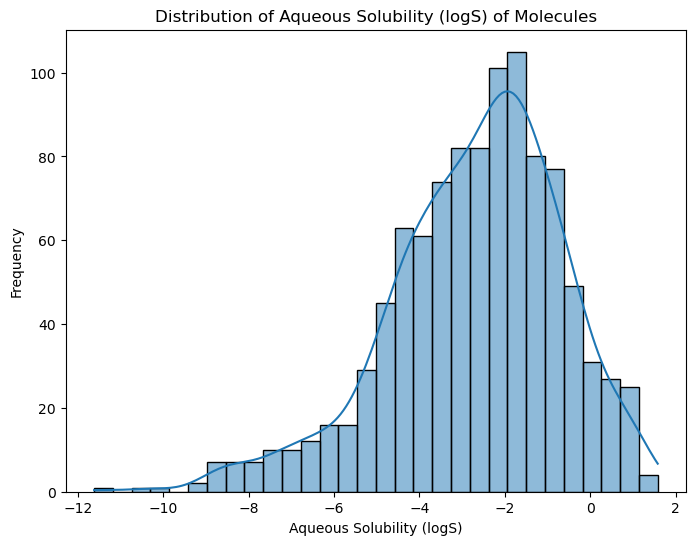

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(labels, bins=30, kde=True)

plt.title('Distribution of Aqueous Solubility (logS) of Molecules')
plt.xlabel('Aqueous Solubility (logS)')
plt.ylabel('Frequency')

plt.show()

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [19]:
nan_counts = df.isna().sum()
total_nan_rows = df.isna().any(axis=1).sum()
print(f"Total number of rows with NaN values: {total_nan_rows}")

Total number of rows with NaN values: 1


In [20]:
df_clean = df.dropna()
labels_clean = [label for label, mol in zip(labels, molecule_list) if mol is not None and mol.GetProp('SOL') != '']
labels_clean = [labels[i] for i in df_clean.index]
print(f"New shape of DataFrame after cleaning: {df_clean.shape}")
print(f"Length of labels after cleaning: {len(labels_clean)}")

New shape of DataFrame after cleaning: (1024, 210)
Length of labels after cleaning: 1024


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
print(df_normalized.head())

        0         1         2         3         4         5         6    \
0  0.045160  0.045160  0.354103  0.913346  0.401233  0.084864  0.042084   
1  0.000000  0.000000  0.395291  0.933978  0.323502  0.330025  0.038831   
2  0.046428  0.046428  0.357068  0.914831  0.393731  0.094293  0.064721   
3  0.047803  0.047803  0.236639  0.854507  0.420664  0.110008  0.064721   
4  0.047142  0.047142  0.142668  0.807435  0.344239  0.141439  0.064721   

        7         8         9    ...  200  201  202  203  204  205  206  207  \
0  0.033447  0.042052  0.072581  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.033447  0.038797  0.064516  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.053504  0.064685  0.096774  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.053504  0.064685  0.096774  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.053504  0.064685  0.096774  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        208  209  
0  0.142857  0.0  
1  0.000000  0.0  
2  0.214286

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_normalized 
y = labels_clean 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 0.6698977386741205


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [24]:
from rdkit import Chem

list_molecule_test = []
suppl_test = Chem.SDMolSupplier('solubility.test.sdf', removeHs=False)

for mol in suppl_test:
    if mol is not None:
        list_molecule_test.append(mol)

print(f"Number of test molecules read: {len(list_molecule_test)}")

Number of test molecules read: 257


In [25]:
test_molecule = list_molecule_test[0] 
test_descriptors = calculate_descriptors(test_molecule)
print(f"Descriptors for the test molecule: {test_descriptors}")

Descriptors for the test molecule: (np.float64(2.2777777777777777), np.float64(2.2777777777777777), np.float64(0.9351851851851851), np.float64(0.9351851851851851), 0.48389029808486866, 10.0, 86.178, 72.06599999999999, 86.109550448, 38, 0, -0.04480471003954574, -0.06512847364618164, 0.06512847364618164, 0.04480471003954574, 1.1666666666666667, 1.5, 1.5, 13.945215218109075, 10.080095912679619, 1.8819366832520852, -1.983213102526966, 2.0233630284165125, -1.8454449878734882, 4.410076596695986, 0.5440639288486602, 1.6500224216483543, np.float64(2.7541847860376616), 19.219280948873624, np.float64(4.99156383156272), 4.99156383156272, 4.99156383156272, np.float64(2.808060412490447), 2.808060412490447, 2.808060412490447, 1.9216682964502652, 1.9216682964502652, 1.3938468501173518, 1.3938468501173518, 0.28867513459481287, 0.28867513459481287, 0.0, np.float64(19.800269059780252), 6.0, 3.2, 2.25, 40.563961599812586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.61285484492389, 5.917906046161

In [26]:
test_descriptors_scaled = scaler.transform([test_descriptors])
print(f"Scaled descriptors for the test molecule: {test_descriptors_scaled}")

Scaled descriptors for the test molecule: [[4.93450562e-02 4.93450562e-02 2.46402446e-01 8.59397339e-01
  4.20663874e-01 1.10008271e-01 6.47209760e-02 5.35037697e-02
  6.46852580e-02 9.67741935e-02 0.00000000e+00 3.52632411e-02
  9.74542356e-01 2.03225924e-02 8.77028110e-02 5.29914530e-01
  4.93421053e-01 3.66197183e-01 4.99540236e-03 2.53398280e-01
  4.80640151e-01 4.10868741e-01 5.97464298e-01 4.86720010e-01
  5.98970262e-02 3.82628396e-01 3.09570933e-01 4.00246663e-01
  1.41509298e-02 9.26112236e-02 1.44226702e-01 1.20172904e-01
  8.50549882e-02 1.56686338e-01 1.34159521e-01 1.50161462e-01
  1.20606995e-01 1.29248808e-01 9.42704083e-02 3.22389649e-02
  2.10541198e-02 6.39774859e-01 1.13107819e-09 1.08670896e-01
  1.69993758e-01 1.90469742e-03 8.27527231e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.89742514e-01 5.37557892e-02 0.00000000e+00
  0.00000000e+00 0.00000000e

In [27]:
predicted_logS = model.predict(test_descriptors_scaled)
real_logS = float(test_molecule.GetProp('SOL'))
print(f"Predicted logS: {predicted_logS[0]}")
print(f"Real logS: {real_logS}")

Predicted logS: -3.36212158203125
Real logS: -3.68
